#### Function

In [1]:
'''
!pip install ipywidgets
!pip install IPython
!pip install graphviz
'''


import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )
  sns.set(rc={'figure.figsize':(8,8)})
  '''
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )
  '''

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df, scatter_kws=dict(color="blue"), line_kws=dict(color="red"))


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data




def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}


def viz_trees(model,fn,cn,upto):
  fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,8), dpi=900)
  for index in range(upto):
      tree.plot_tree(model.estimators_[index],
                    feature_names = fn,
                    class_names=cn,
                    filled = True,
                    ax = axes[index]);

      axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
  fig.savefig(str(model)+'.png')




def viz_single_tree(model,fn,cn,est):
  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,27), dpi=500)
  tree.plot_tree(model.estimators_[est],
                feature_names = fn,
                class_names=cn,
                filled = True);
  fig.savefig(str(model)+'.png')


!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys




def Search_Null(dataset):
  dic={}
  for col in list(dataset.columns):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == "nan":
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic



#### Dataset Read

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error

#dataset=pd.read_csv("/home/iqh4001/Iqram_WCM/MADE Lab/Wearable Project/Data/Fitbit Results Data/Final Feature Matrix/Updated/Null Replaced feature matrix/MADE Lab/MADELab_Fitabase_feature_matrix_S00-S70_2024-04-30_18-52PM.csv")

dataset=pd.read_csv("MADELab_Fitabase_feature_matrix_S00-S70_2024-04-30_18-52PM.csv")



In [3]:
dataset.head(150)

Subject_ID Condition  HR_MAX(BPM)  aEE_MAX(J/min)  slope_HR/Calories  \
0       001-JV       pre          149           68.22           1.319097   
1       001-JV      post          149           63.90           1.445584   
2       002-JR       pre          137           63.81           1.146421   
3       002-JR      post          145           58.01           1.358319   
4       003-ES       pre          130           34.42           2.083209   
..         ...       ...          ...             ...                ...   
125     068-VB      post          154           58.59           1.490403   
126     069-MF       pre          146           45.31           1.839495   
127     069-MF      post          165           70.89           1.314745   
128     070-DW       pre          140           31.72           2.846716   
129     070-DW      post          132           28.50           2.554245   

     Intercept_HR/Calories  Light_Activity_ratio(%)  \
0                59.013030                96.875000   
1                56.622563                97.761194   
2                63.844702                88.043478   
3                66.200422                96.992481   
4                58.302814                35.294118   
..                     ...                      ...   
125              66.674648               100.000000   
126              62.657270                92.000000   
127              71.801318                92.424242   
128              49.702900                41.666667   
129              59.196260                68.571429   

     Moderate-Low_Activity_ratio(%)  Moderate-High_Activity_ratio(%)  \
0                          1.875000                         0.625000   
1                          1.492537                         0.746269   
2                         11.956522                         6.657909   
3                          3.007519                         6.657909   
4                         17.647059                        44.117647   
..                              ...                              ...   
125                        9.751470                         6.263184   
126                        8.000000                         6.868305   
127                        3.030303                         0.757576   
128                       50.000000                         6.505233   
129                       28.571429                         6.505233   

     Vigorous-Activity_ratio(%)  ...  Cardiovascular:.1  Neruological:  \
0                      0.625000  ...                 No             No   
1                     13.317295  ...                 No             No   
2                     27.677090  ...                 No             No   
3                     27.677090  ...                 No             No   
4                      2.941176  ...                 No             No   
..                          ...  ...                ...            ...   
125                   22.018584  ...                 No             No   
126                   30.693181  ...                 No             No   
127                    3.787879  ...                 No             No   
128                    8.333333  ...                 No             No   
129                    2.857143  ...                 No             No   

     Wound:.1  Wound Complication Notes/Clavien-Dindo Assessment Grade:.1  \
0          No                                                NaN            
1          No                                                NaN            
2          No                                                NaN            
3          No                                                NaN            
4          No                                                NaN            
..        ...                                                ...            
125        No                                                NaN            
126        No                                               

#### Adding 6MWT

#### Label Creation

In [4]:
dataset.rename(columns = {'1_min_HR_Recovery':'HRR_60'}, inplace = True)
dataset.rename(columns = {'2_min_HR_Recovery':'HRR_120'}, inplace = True)
dataset.rename(columns = {'3_min_HR_Recovery':'HRR_180'}, inplace = True)
dataset.rename(columns = {'4_min_HR_Recovery':'HRR_240'}, inplace = True)
dataset.rename(columns = {'5_min_HR_Recovery':'HRR_300'}, inplace = True)
dataset.rename(columns = {'Is patient on Beta Blockers:':'Is patient on Beta Blockers'}, inplace = True)
dataset.rename(columns = {'Vigorous-Activity_ratio(%)':'Vigorous_Activity_ratio(%)'}, inplace = True)
dataset.rename(columns = {'Age (years): ':'Age(years)'}, inplace = True)
dataset.rename(columns = {'Body Mass Index:':'BMI'}, inplace = True)




In [ ]:
dataset['Gender'].replace('M',1, inplace=True)
dataset['Gender'].replace('F',2, inplace=True)
dataset['Is patient on Beta Blockers'].replace('Yes',1, inplace=True)
dataset['Is patient on Beta Blockers'].replace('No',2, inplace=True)

<ipython-input-5-3333e449dfeb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace('M',1, inplace=True)
<ipython-input-5-3333e449dfeb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
list(dataset.columns)

['Subject_ID',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 'Light_Activity_ratio(%)',
 'Moderate-Low_Activity_ratio(%)',
 'Moderate-High_Activity_ratio(%)',
 'Vigorous_Activity_ratio(%)',
 'HRR_60',
 'HRR_120',
 'HRR_180',
 'HRR_240',
 'HRR_300',
 'nni_counter_Vigorous',
 'nni_counter_Moderate-High',
 'nni_counter_Moderate-Low',
 'nni_counter_Light',
 'nni_mean_Vigorous',
 'nni_mean_Moderate-High',
 'nni_mean_Moderate-Low',
 'nni_mean_Light',
 'nni_min_Vigorous',
 'nni_min_Moderate-High',
 'nni_min_Moderate-Low',
 'nni_min_Light',
 'nni_max_Vigorous',
 'nni_max_Moderate-High',
 'nni_max_Moderate-Low',
 'nni_max_Light',
 'hr_mean_Vigorous',
 'hr_mean_Moderate-High',
 'hr_mean_Moderate-Low',
 'hr_mean_Light',
 'hr_min_Vigorous',
 'hr_min_Moderate-High',
 'hr_min_Moderate-Low',
 'hr_min_Light',
 'hr_max_Vigorous',
 'hr_max_Moderate-High',
 'hr_max_Moderate-Low',
 'hr_max_Light',
 'hr_std_Vigorous',
 'hr_std_Moderate-High',
 'hr_std_Mod

In [ ]:
#target = "VO2_Max_6MWT"


loc = dataset.columns.get_loc("HRR_300") + 1
dataset.insert(loc,"6MWT_m",np.nan)
#dataset.insert(loc+1,"VO2_aEEmax(ml/kg/min)",np.nan)
for i in range(dataset.shape[0]):
  #dataset["VO2_Max_6MWT(ml/kg/min)"][i] = 59.44 - 3.83 * dataset['Gender'][i] - 0.56*(dataset["Age (years): "][i]+(dataset["Age (months): "][i])/12) - 0.48 * dataset["Body Mass Index:"][i] + 0.04*0.3048*dataset["Distance Walked:"][i]
  #dataset["VO2_aEEmax(ml/kg/min)"][i] = (dataset['aEE_MAX(J/min)'][i]) / 4.184 / 4.825 * 1000 / (dataset['Weight (kg):'][i])
  #dataset["6MWT(m)"][i] = 0.3048*dataset["Distance Walked:"][i]
  #dataset["VO2_peak_6MWT"][i] =4.948 + 0.023*0.3048*dataset["Distance Walked:"][i]
  dataset["6MWT_m"][i] = 0.3048*(dataset["Distance Walked:"][i])


#### Split Dataset into pre and post

In [8]:
pre_dataset = dataset.query("Condition == 'pre'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post'").reset_index(drop=True)


In [9]:
dataset = pre_dataset

#### Custom Feature Selection

In [10]:
new_features = [
'Subject_ID',
 'Condition',
 'BMI',
 'Gender',
 'Age(years)',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 'slope_HR/Calories',
 'Intercept_HR/Calories',
 'Light_Activity_ratio(%)',
 'Moderate-Low_Activity_ratio(%)',
 'Moderate-High_Activity_ratio(%)',
 'Vigorous_Activity_ratio(%)',
 'HRR_60',
 'HRR_120',
 'HRR_180',
 'HRR_240',
 'HRR_300',
 'hr_mean_Vigorous',
 'hr_mean_Moderate-High',
 'hr_mean_Moderate-Low',
 'hr_mean_Light',
 'hr_min_Vigorous',
 'hr_min_Moderate-High',
 'hr_min_Moderate-Low',
 'hr_min_Light',
 'hr_max_Vigorous',
 'hr_max_Moderate-High',
 'hr_max_Moderate-Low',
 'hr_max_Light',
 'hr_std_Vigorous',
 'hr_std_Moderate-High',
 'hr_std_Moderate-Low',
 'hr_std_Light',
 'sdnn_Vigorous',
 'sdnn_Moderate-High',
 'sdnn_Moderate-Low',
 'sdnn_Light',
 'rmssd_Vigorous',
 'rmssd_Moderate-High',
 'rmssd_Moderate-Low',
 'rmssd_Light',
 'sdsd_Vigorous',
 'sdsd_Moderate-High',
 'sdsd_Moderate-Low',
 'sdsd_Light',
 'nn50_Vigorous',
 'nn50_Moderate-High',
 'nn50_Moderate-Low',
 'nn50_Light',
 'pnn50_Vigorous',
 'pnn50_Moderate-High',
 'pnn50_Moderate-Low',
 'pnn50_Light',
 'nn20_Vigorous',
 'nn20_Moderate-High',
 'nn20_Moderate-Low',
 'nn20_Light',
 'pnn20_Vigorous',
 'pnn20_Moderate-High',
 'pnn20_Moderate-Low',
 'pnn20_Light',
 'fft_rel_vlf_Vigorous',
 'fft_rel_vlf_Moderate-High',
 'fft_rel_vlf_Moderate-Low',
 'fft_rel_vlf_Light',
 'fft_rel_lf_Vigorous',
 'fft_rel_lf_Moderate-High',
 'fft_rel_lf_Moderate-Low',
 'fft_rel_lf_Light',
 'fft_ratio_Vigorous',
 'fft_ratio_Moderate-High',
 'fft_ratio_Moderate-Low',
 'fft_ratio_Light',
 'fft_total_Vigorous',
 'fft_total_Moderate-High',
 'fft_total_Moderate-Low',
 'fft_total_Light',
 'sd1_Vigorous',
 'sd1_Moderate-High',
 'sd1_Moderate-Low',
 'sd1_Light',
 'sd2_Vigorous',
 'sd2_Moderate-High',
 'sd2_Moderate-Low',
 'sd2_Light',
 'sd_ratio_Vigorous',
 'sd_ratio_Moderate-High',
 'sd_ratio_Moderate-Low',
 'sd_ratio_Light',
 'ellipse_area_Vigorous',
 'ellipse_area_Moderate-High',
 'ellipse_area_Moderate-Low',
 'ellipse_area_Light',
 'sampen_Vigorous',
 'sampen_Moderate-High',
 'sampen_Moderate-Low',
 'sampen_Light',
 'dfa_alpha1_Vigorous',
 'dfa_alpha1_Moderate-High',
 'dfa_alpha1_Moderate-Low',
 'dfa_alpha1_Light',
 'dfa_alpha2_Vigorous',
 'dfa_alpha2_Moderate-High',
 'dfa_alpha2_Moderate-Low',
 'dfa_alpha2_Light',
 'Is patient on Beta Blockers',
 '6MWT_m'
]

In [11]:
new_dataset = dataset.loc[:,new_features]

#### Feature Selection

In [12]:
target = '6MWT_m'

In [13]:
X = new_dataset.loc[:, new_dataset.columns!=target]
X = X.drop(['Subject_ID', 'Condition'], axis=1)

y = new_dataset[target]


fn=X.columns
cn=list(set(y))

new_dataset[target].value_counts()

6MWT_m
416.0520    4
435.8640    3
455.6760    3
382.5240    2
554.7360    2
495.3000    2
475.4880    2
356.3112    1
480.0600    1
470.9160    1
206.9592    1
465.5820    1
498.3480    1
420.6240    1
306.3240    1
410.8704    1
372.4656    1
361.1880    1
443.7888    1
370.3320    1
426.1104    1
379.7808    1
277.3680    1
283.4640    1
255.1176    1
342.2904    1
499.8720    1
329.1840    1
281.9400    1
431.2920    1
330.7080    1
431.5968    1
364.8456    1
539.8008    1
450.1896    1
215.4936    1
439.5216    1
490.1184    1
468.1728    1
440.7408    1
542.2392    1
469.3920    1
399.8976    1
234.6960    1
534.6192    1
534.9240    1
478.5360    1
457.2000    1
572.1096    1
520.5984    1
445.6176    1
520.2936    1
489.2040    1
Name: count, dtype: int64

In [14]:
new_features_6MWT = [
 'aEE_MAX(J/min)',
 'Light_Activity_ratio(%)',
 'Moderate-Low_Activity_ratio(%)',
 'Moderate-High_Activity_ratio(%)',
 'Vigorous_Activity_ratio(%)',
 'HRR_240',
 'slope_HR/Calories',
 'fft_rel_lf_Moderate-Low',
'dfa_alpha1_Moderate-Low',
 'sd_ratio_Moderate-High',
 'fft_rel_vlf_Moderate-Low',
 'sampen_Moderate-High',
 'fft_total_Vigorous',
 'hr_max_Moderate-High',
 'sdnn_Moderate-High',
 'pnn20_Moderate-Low',
 'fft_total_Moderate-High',
 'fft_rel_vlf_Moderate-High',
 'BMI',
 'Gender',
 'Age(years)',
 'Is patient on Beta Blockers'
 ]

In [15]:
final_list_feature1 = new_features_6MWT

In [16]:
X_new = new_dataset.loc[:,final_list_feature1]
y_new = new_dataset[target]

In [17]:
new_dataset = new_dataset.loc[:,final_list_feature1+[target]]
#new_dataset = new_dataset.loc[:]

In [18]:
new_dataset.shape

(65, 23)

#### New Selection Of Train And Test


In [19]:
import ipywidgets as widgets
from IPython.display import display
import math

df_sorted = new_dataset.sort_values(by=target, ascending=True)
min_range, max_range = math.floor(df_sorted[target].min()),math.ceil(df_sorted[target].max())


range_gap = 80

populate_range = []

"""for i in range(min_range,100000,range_gap):
  if i >= max_range:
    break
  populate_range.append((i,i+range_gap-1))
"""

for i in np.arange(min_range,100000,range_gap):
  if i >= max_range:
    break
  populate_range.append((i,i+range_gap-0.01))


text_inputs = []
for i in range(len(populate_range)):

    text_train = widgets.Text(value='', description='Train:')
    text_inputs.append(text_train)




for t_i in range(len(text_inputs)):
    temp_data=new_dataset[(new_dataset[target] >= populate_range[t_i][0]) & ( new_dataset[target] <= populate_range[t_i][1])]
    print("Range:",(populate_range[t_i]),"---- Total Row: ",temp_data.shape[0])
    display(text_inputs[t_i])
    print("__________________________________________________________________")
    print()

Range: (206, 285.99) ---- Total Row:  7


Text(value='', description='Train:')

__________________________________________________________________

Range: (286, 365.99) ---- Total Row:  7


Text(value='', description='Train:')

__________________________________________________________________

Range: (366, 445.99) ---- Total Row:  22


Text(value='', description='Train:')

__________________________________________________________________

Range: (446, 525.99) ---- Total Row:  21


Text(value='', description='Train:')

__________________________________________________________________

Range: (526, 605.99) ---- Total Row:  7


Text(value='', description='Train:')

__________________________________________________________________



In [20]:
fin_comb = []
for t_i in range(len(text_inputs)):
    fin_comb.append(int(text_inputs[t_i].value))


data = {col: [] for col in list(new_dataset.loc[0:0,new_dataset.columns!=target].columns)}
X_train = pd.DataFrame(data)
X_test =  pd.DataFrame(data)

y_train = pd.DataFrame({target:[]})
y_test = pd.DataFrame({target:[]})



for i in range(len(populate_range)):
  temp = new_dataset[(new_dataset[target] >= populate_range[i][0]) & ( new_dataset[target] <= populate_range[i][1])].reset_index(drop=True)
  X_train  = pd.concat([X_train,temp.iloc[:fin_comb[i],temp.columns != target]], ignore_index=True)

  y_train  = pd.concat([y_train,temp.iloc[:fin_comb[i],temp.columns == target]], ignore_index=True)

  X_test  = pd.concat([X_test,temp.iloc[fin_comb[i]:,temp.columns != target]], ignore_index=True)
  y_test = pd.concat([y_test,temp.iloc[fin_comb[i]:,temp.columns == target]], ignore_index=True)
  print()



y_train =  y_train[target]
y_test = y_test[target]

#### Models

In [21]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [22]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.6 MB/s eta 0:00:00


In [23]:
"""
!pip install shap
"""


import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

shap.initjs()

In [ ]:
"""X_train = X
y_train = y"""

'X_train = X\ny_train = y'

In [24]:
saving_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Wearable Project/Data/Fitbit Codebase/Fitbit ML/Fitbit Risk Estimation/Fitbit Dataset Pre-op/Saved ML Models_Fitbit_V02_regression/'
saving_path="/content/"

#### Random Forest Regressor

##### Training

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,20):
  rfr = RandomForestRegressor(max_depth=i,random_state=42)

  rfr.fit(X_train, y_train)
  y_pred_train = rfr.predict(X_train)
  r2=r2_score(y_train,y_pred_train)
  print("RF Training r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("RF Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

RF Training r2:  0.7413951722603987 , When Max Depth: 2
RF Training r2:  0.8379776854270222 , When Max Depth: 3
RF Training r2:  0.8753081914191655 , When Max Depth: 4
RF Training r2:  0.8856890008698326 , When Max Depth: 5
RF Training r2:  0.8894477053833337 , When Max Depth: 6
RF Training r2:  0.8909189166052374 , When Max Depth: 7
RF Training r2:  0.8927351357050636 , When Max Depth: 8
RF Training r2:  0.893416621530291 , When Max Depth: 9
RF Training r2:  0.8930782536849906 , When Max Depth: 10
RF Training r2:  0.8926141867429871 , When Max Depth: 11
RF Training r2:  0.8926141867429871 , When Max Depth: 12
RF Training r2:  0.8926141867429871 , When Max Depth: 13
RF Training r2:  0.8926141867429871 , When Max Depth: 14
RF Training r2:  0.8926141867429871 , When Max Depth: 15
RF Training r2:  0.8926141867429871 , When Max Depth: 16
RF Training r2:  0.8926141867429871 , When Max Depth: 17
RF Training r2:  0.8926141867429871 , When Max Depth: 18
RF Training r2:  0.8926141867429871 , Wh

##### Model Saving

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import joblib
regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)
joblib.dump(regr2, saving_path+'regr2_max_depth2.pkl')"""

['/home/iqh4001/Iqram_WCM/MADE Lab/Wearable Project/Data/Fitbit Codebase/Fitbit ML/Fitbit Risk Estimation/Fitbit Dataset Pre-op/Saved ML Models_Fitbit_V02_regression/regr2_max_depth2.pkl']

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import joblib
from datetime import datetime

# Train your RandomForestRegressor model
regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)

# Generate a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model with the timestamp in the filename
saving_filename = f"regr2_max_depth2_{timestamp}.pkl"
joblib.dump(regr2, saving_path + saving_filename)


['/content/regr2_max_depth2_20241016_064340.pkl']

##### Shapley values for all patients

Training R²:  0.893416621530291
Global Explanation


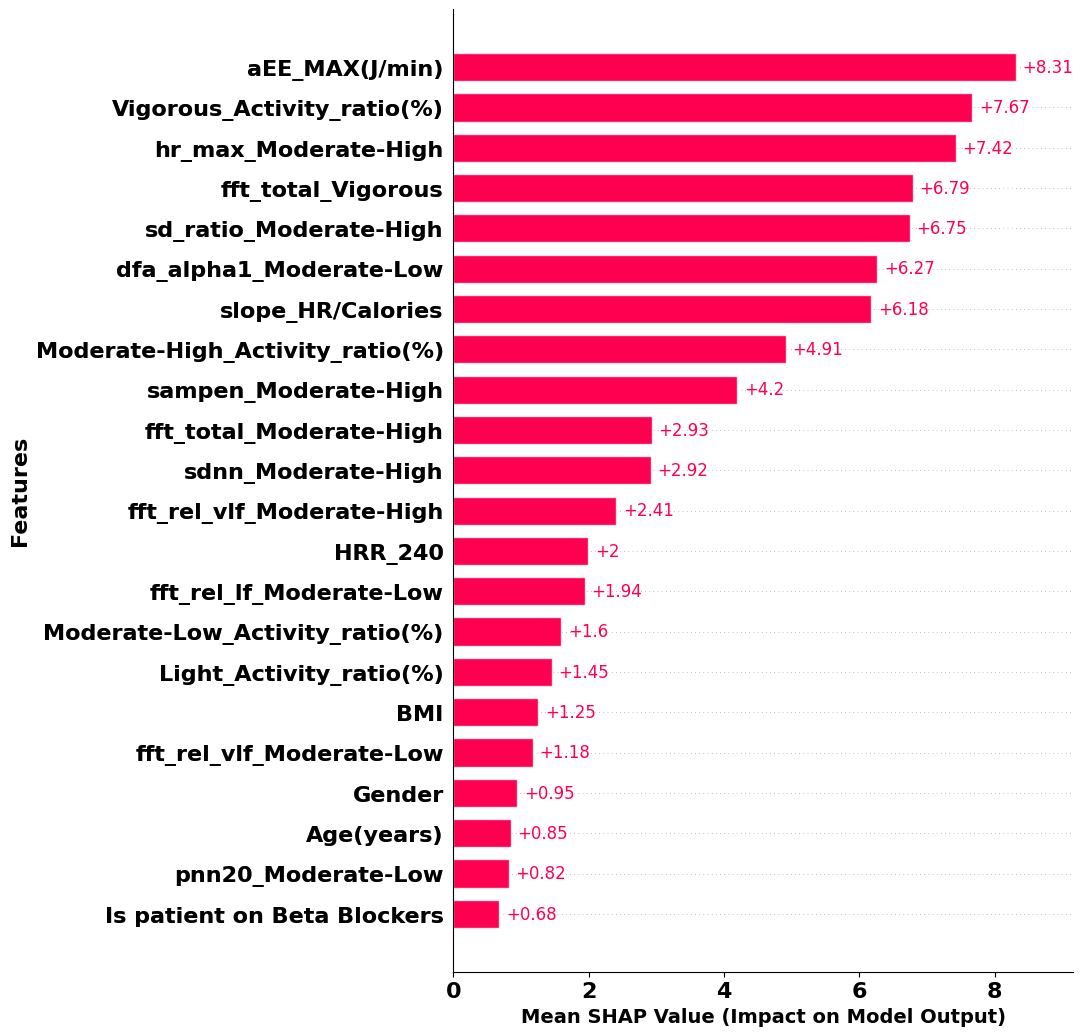

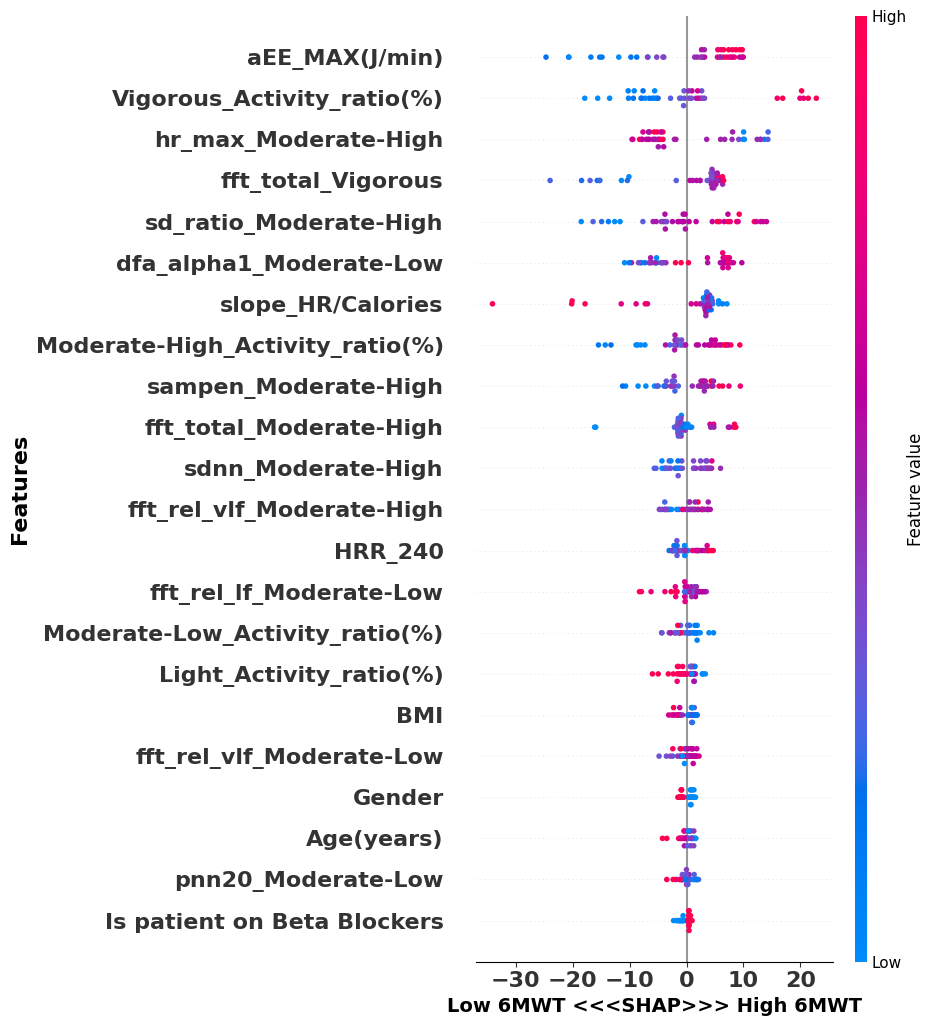

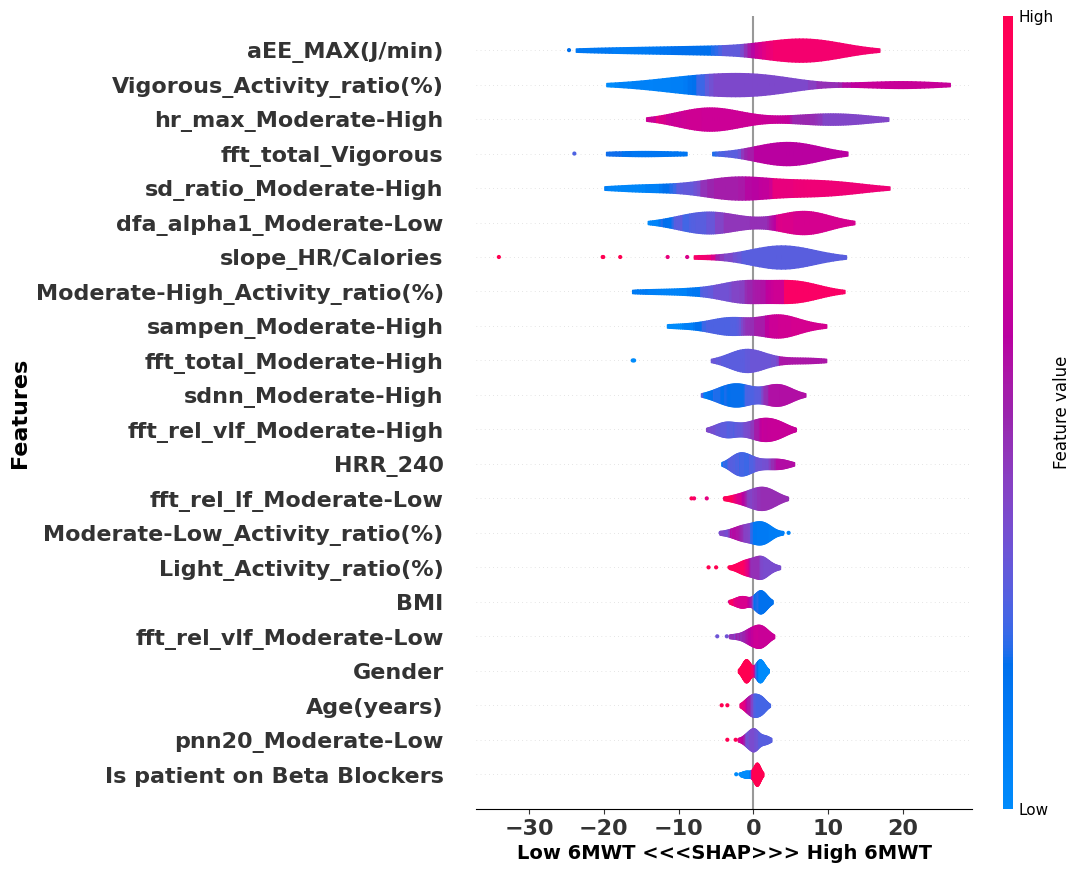

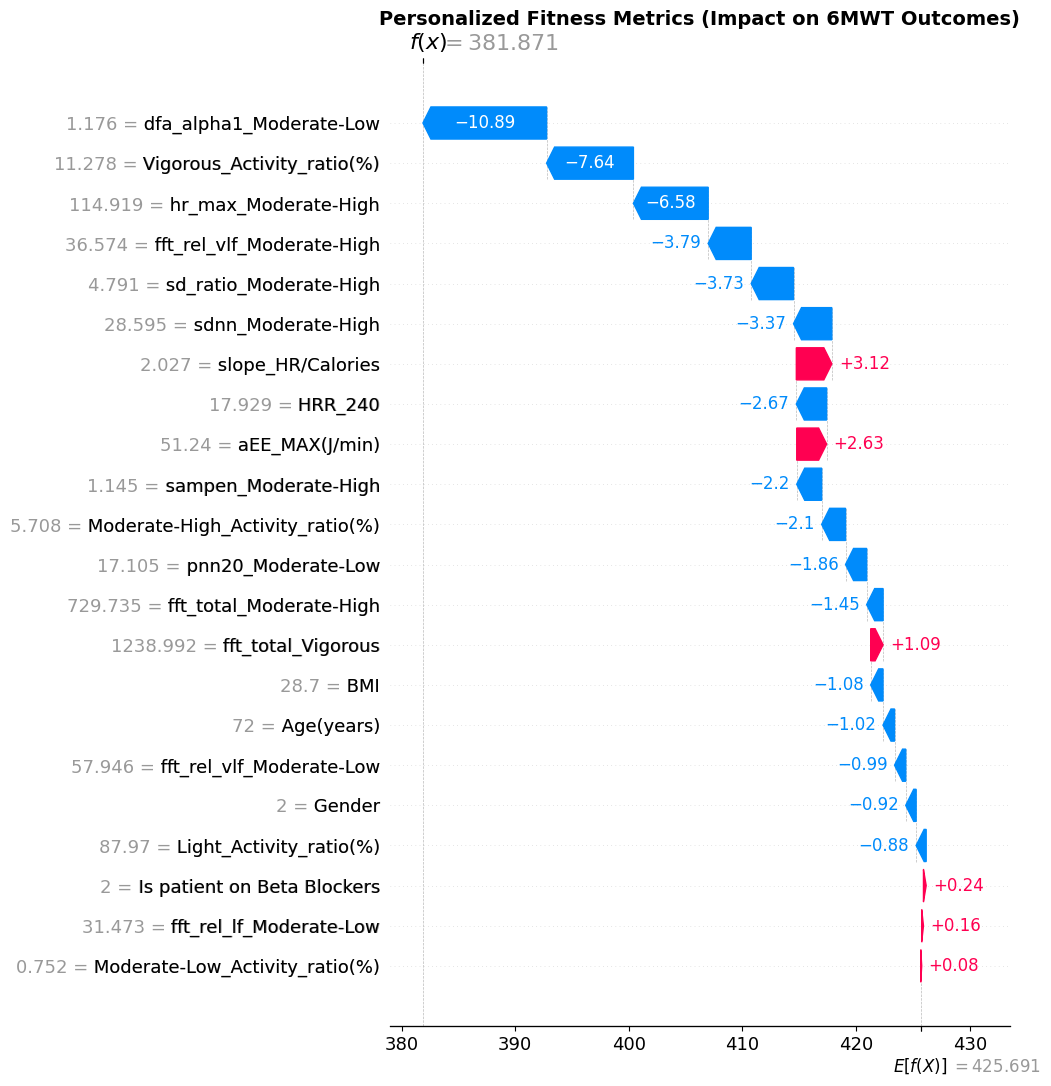

   aEE_MAX(J/min)  Light_Activity_ratio(%)  Moderate-Low_Activity_ratio(%)  \
0      -20.704836                -1.361361                       -4.319433   
1      -20.662395                -4.977768                        1.091621   
2       -6.854589                -0.684817                       -3.051739   
3      -24.678285                -1.647111                       -4.383523   
4        6.500050                -5.990012                        1.857658   

   Moderate-High_Activity_ratio(%)  Vigorous_Activity_ratio(%)   HRR_240  \
0                       -13.270771                  -10.249271 -2.201249   
1                       -14.277948                   -9.190508 -2.491242   
2                        -3.696185                  -10.193508 -1.668171   
3                       -15.472694                  -17.872424 -2.561509   
4                        -8.873964                  -13.507653 -1.180373   

   slope_HR/Calories  fft_rel_lf_Moderate-Low  dfa_alpha1_Moderate-Low  \


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from datetime import datetime

# Train RandomForestRegressor
regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))], random_state=42)
regr2.fit(X_train, y_train)

# Compute R-squared for training data
R_sq = regr2.score(X_train, y_train)
print("Training R²: ", R_sq)

# Get SHAP values
explainer2 = shap.Explainer(regr2, X_train)
check_additivity = False
shap_values2 = explainer2(X_train, check_additivity=check_additivity)

# Plotting Global SHAP explanation
print("Global Explanation")
shap.plots.bar(shap_values2, max_display=50, show=False)
plt.xlabel('Mean SHAP Value (Impact on Model Output)', fontweight="bold", fontsize=14)
plt.ylabel('Features', fontweight="bold", fontsize=16)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

# SHAP Summary plot
shap.summary_plot(shap_values2, max_display=50, show=False)
plt.xlabel('Low 6MWT <<<SHAP>>> High 6MWT', fontweight="bold", fontsize=14)
plt.ylabel('Features', fontweight="bold", fontsize=16)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

# SHAP Violin plot
shap.plots.violin(shap_values2, max_display=50, show=False)
plt.xlabel('Low 6MWT <<<SHAP>>> High 6MWT', fontweight="bold", fontsize=14)
plt.ylabel('Features', fontweight="bold", fontsize=16)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

# SHAP Waterfall plot for a specific instance
ind = 5  # Change this index to select another instance
shap.plots.waterfall(shap_values2[ind], max_display=50, show=False)
plt.xlabel('Personalized Fitness Metrics (Impact on 6MWT Outcomes)', fontweight="bold", fontsize=14)
plt.ylabel('Features', fontweight="bold", fontsize=16)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

# SHAP Scatter plot for a specific feature
#shap.plots.scatter(shap_values2[:, "aEE_MAX(J/min)"])

# SHAP Force plot
shap.initjs()
shap.plots.force(shap_values2[ind], figsize=(20, 10), text_rotation=0)

# Creating a DataFrame of SHAP values for analysis
feature_names = X_train.columns
shap_values__training_df = pd.DataFrame(shap_values2.values, columns=feature_names)

# Adding actual and predicted target values
shap_values__training_df['Actual_Target_6MWT'] = y_train.values
shap_values__training_df['Predicted_Target_6MWT'] = regr2.predict(X_train)

# Display the first few rows of SHAP values with actual and predicted targets
print(shap_values__training_df.head())

# Generate a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Define the file name with the timestamp
filename = f"shap_values_for_all_patients_training_{timestamp}.csv"

# Save the DataFrame to a CSV file with the timestamp
shap_values__training_df.to_csv(filename, index=False)

print(f"SHAP values saved to {filename}")



##### Testing

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,15):
  rfr = RandomForestRegressor(max_depth=i, random_state=42)

  rfr.fit(X_train, y_train)
  y_pred_test = rfr.predict(X_test)
  r2=r2_score(y_test,y_pred_test)
  print("RF Testing r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)

print("RF Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

RF Testing r2:  0.4037450122887577 , When Max Depth: 2
RF Testing r2:  0.47321735542686916 , When Max Depth: 3
RF Testing r2:  0.48557452504092247 , When Max Depth: 4
RF Testing r2:  0.5187606533656322 , When Max Depth: 5
RF Testing r2:  0.5039705845751411 , When Max Depth: 6
RF Testing r2:  0.5143601084893177 , When Max Depth: 7
RF Testing r2:  0.5174915712910593 , When Max Depth: 8
RF Testing r2:  0.517155824804824 , When Max Depth: 9
RF Testing r2:  0.5204615077310761 , When Max Depth: 10
RF Testing r2:  0.5206713594611372 , When Max Depth: 11
RF Testing r2:  0.5206713594611372 , When Max Depth: 12
RF Testing r2:  0.5206713594611372 , When Max Depth: 13
RF Testing r2:  0.5206713594611372 , When Max Depth: 14
RF Max R2:  0.5206713594611372  Max Depth:  11


##### Shapley_test

Testing r2:  0.5206713594611372
R_sq:  0.5206713594611372


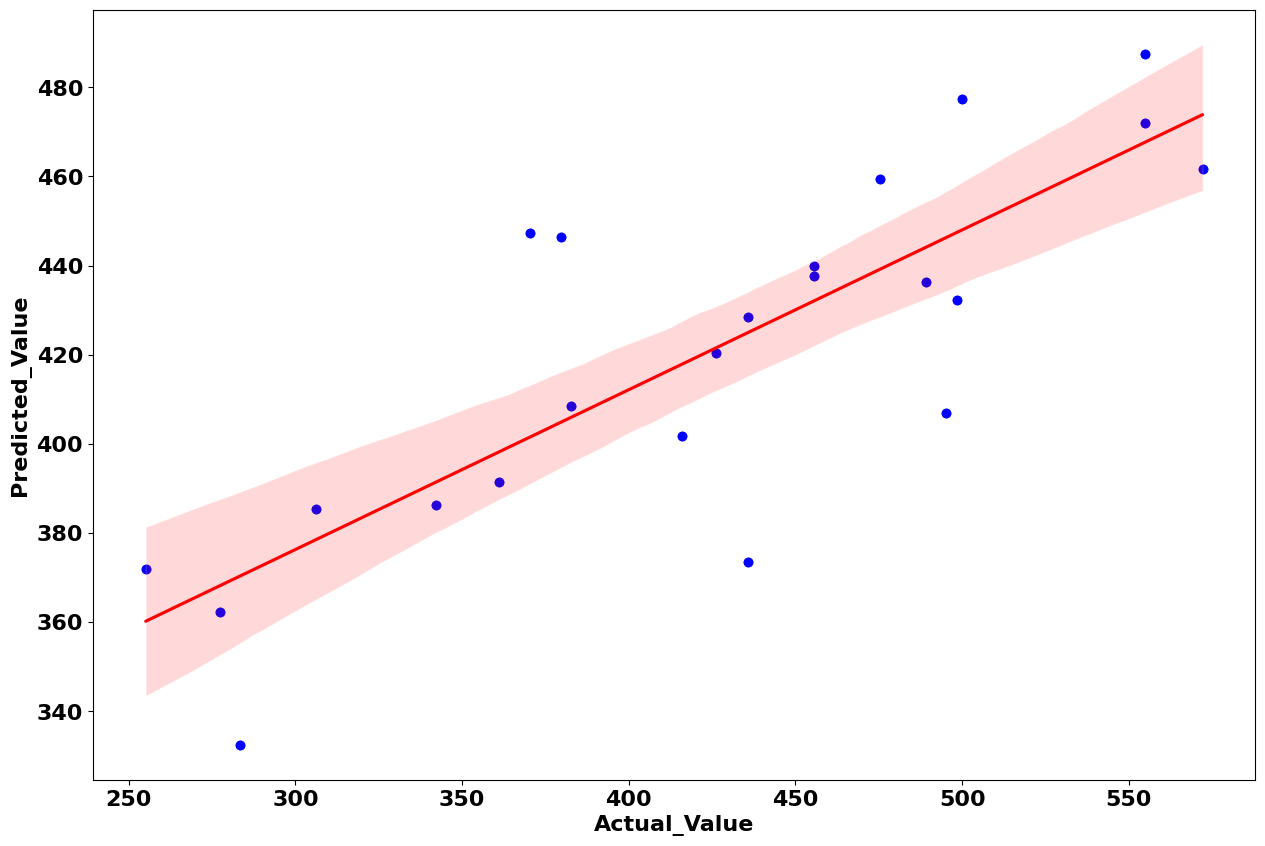

Global Explaination


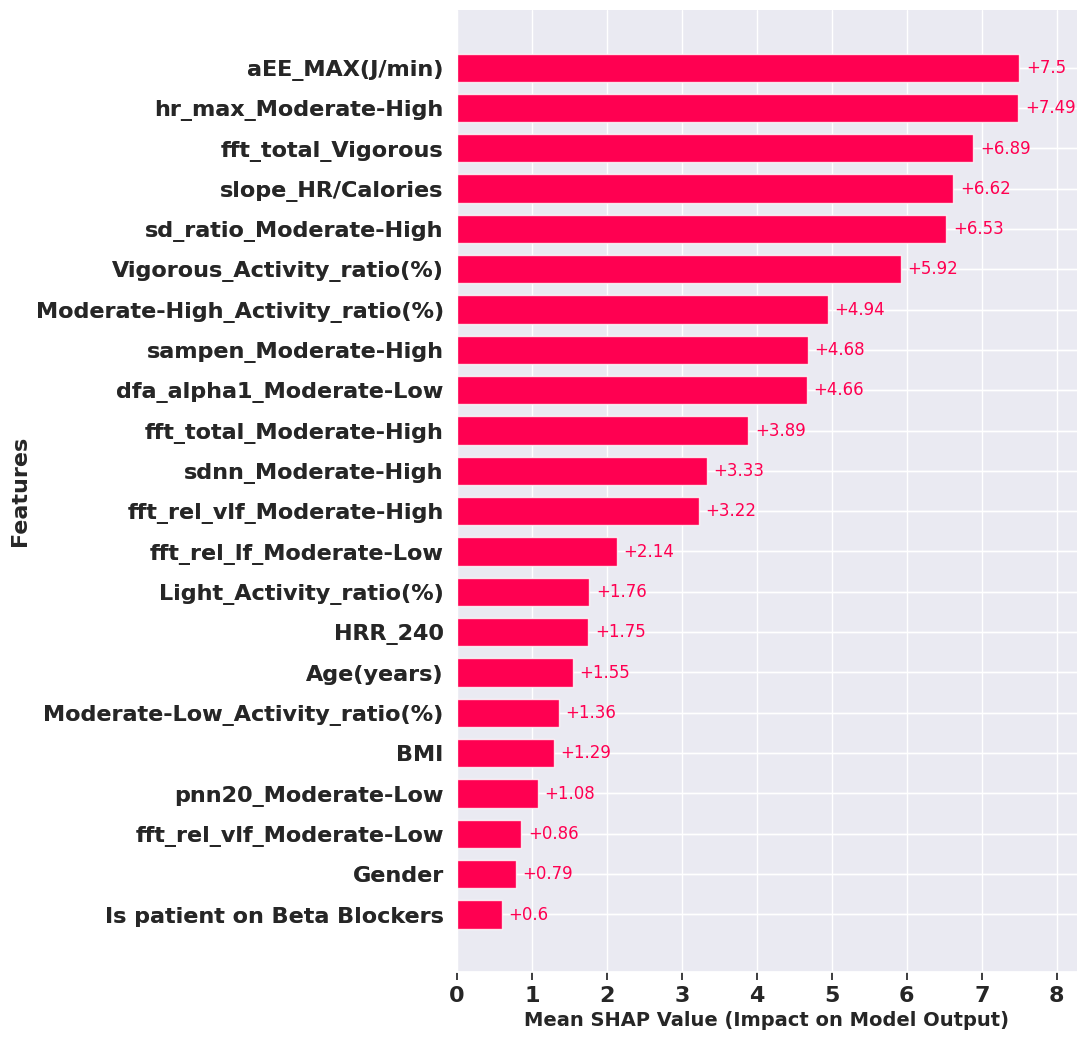

Global Explaination


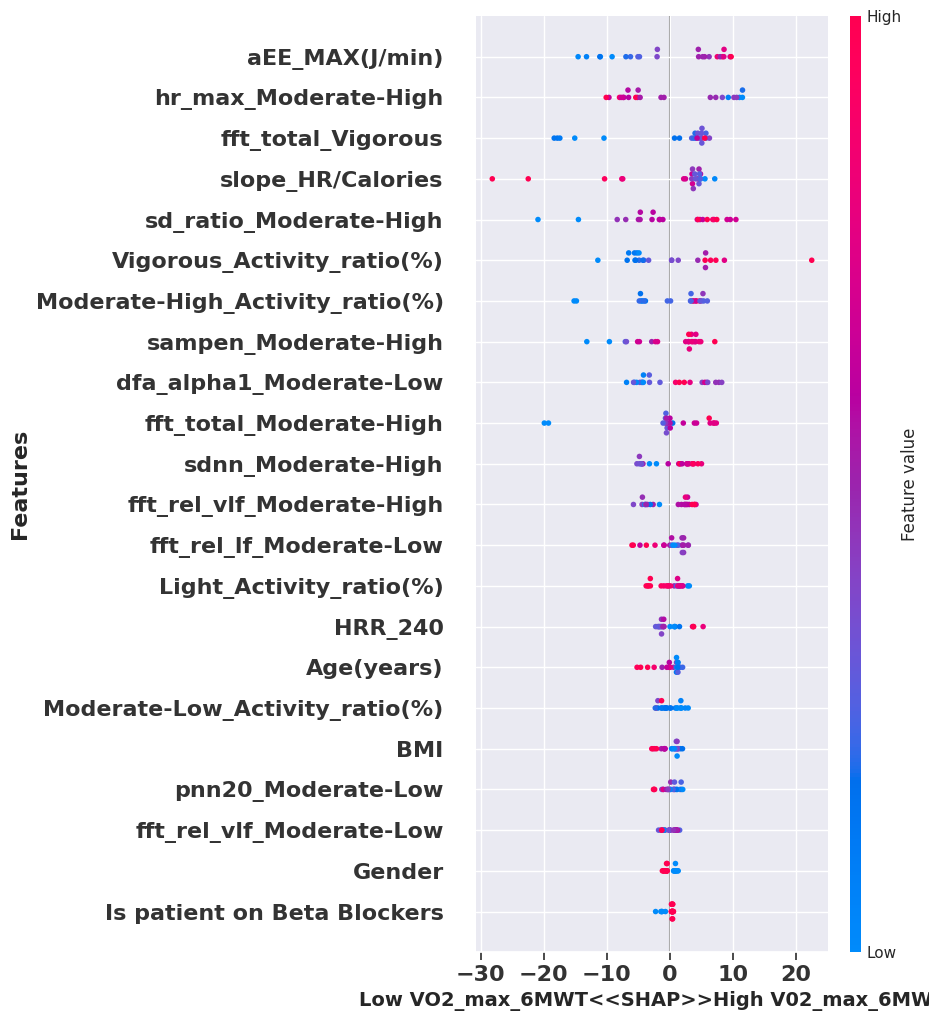

__________________________


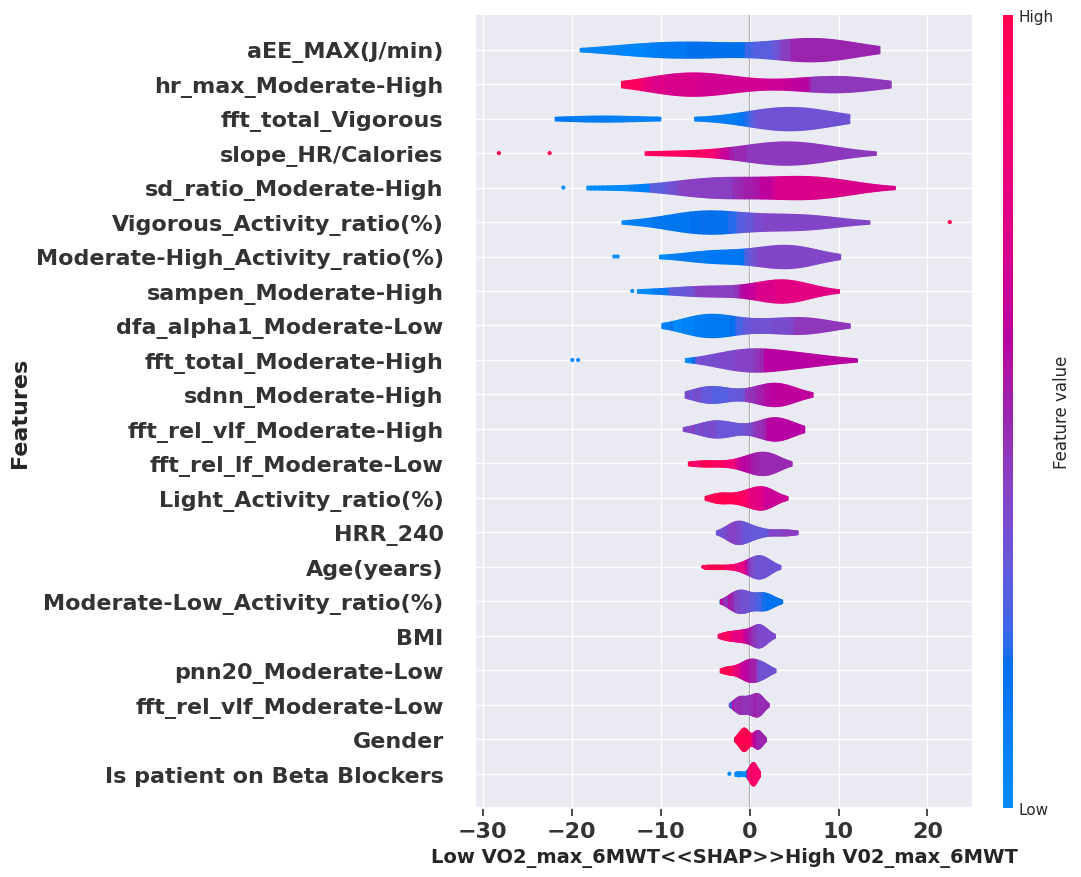

Local Explaination


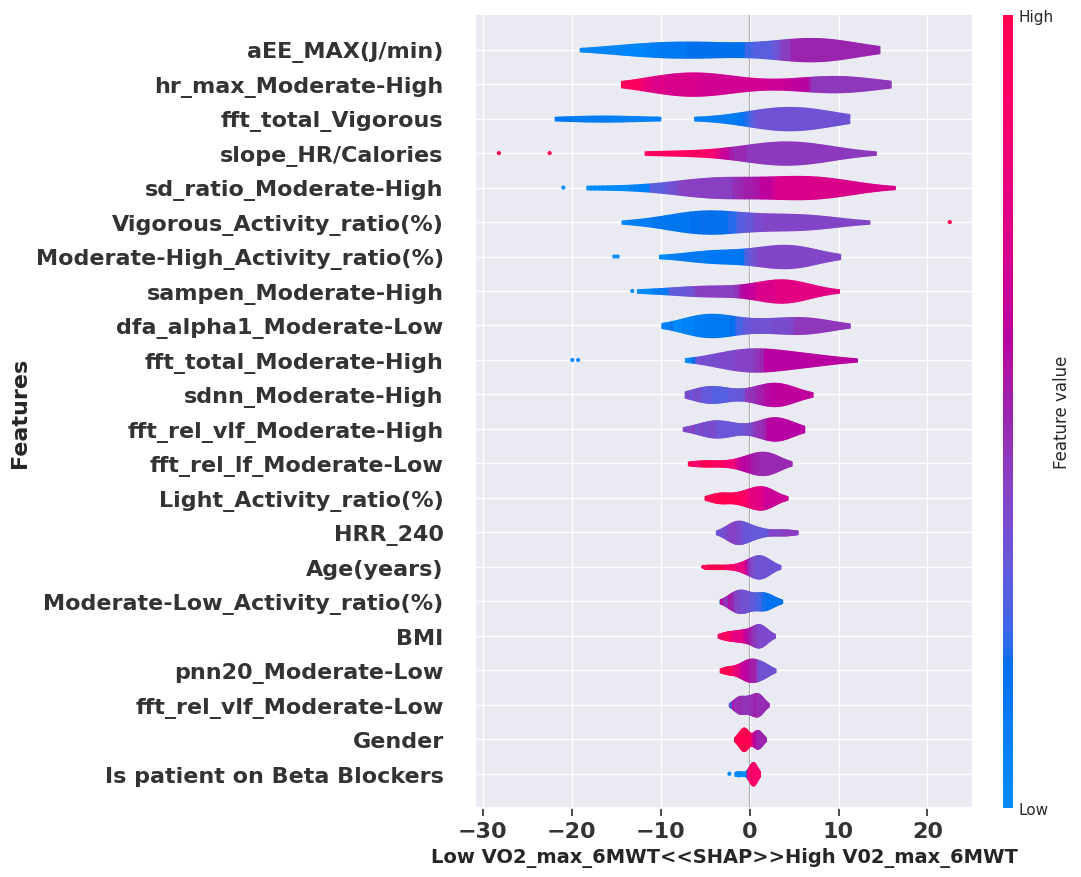

___________________________
Local Explaination


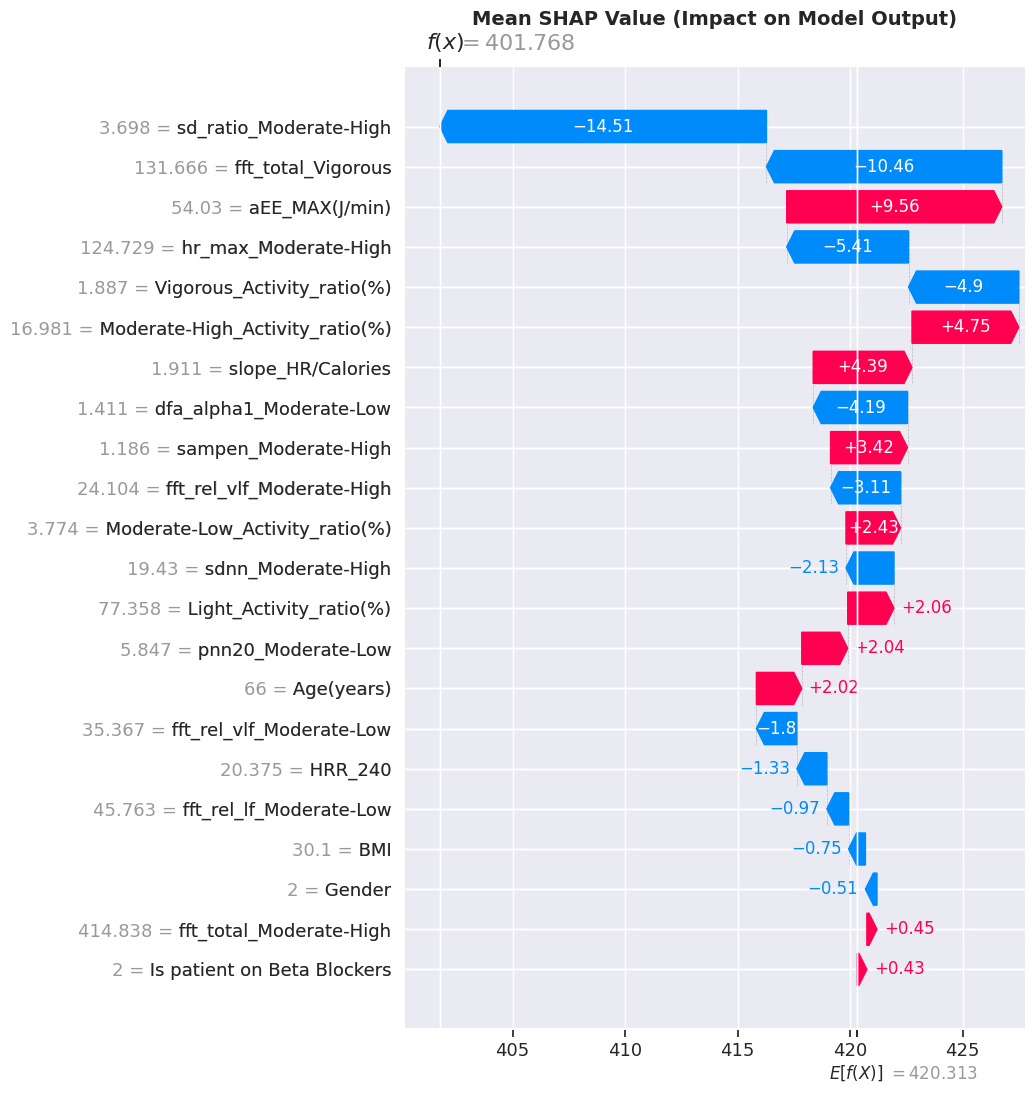

Local Explaination


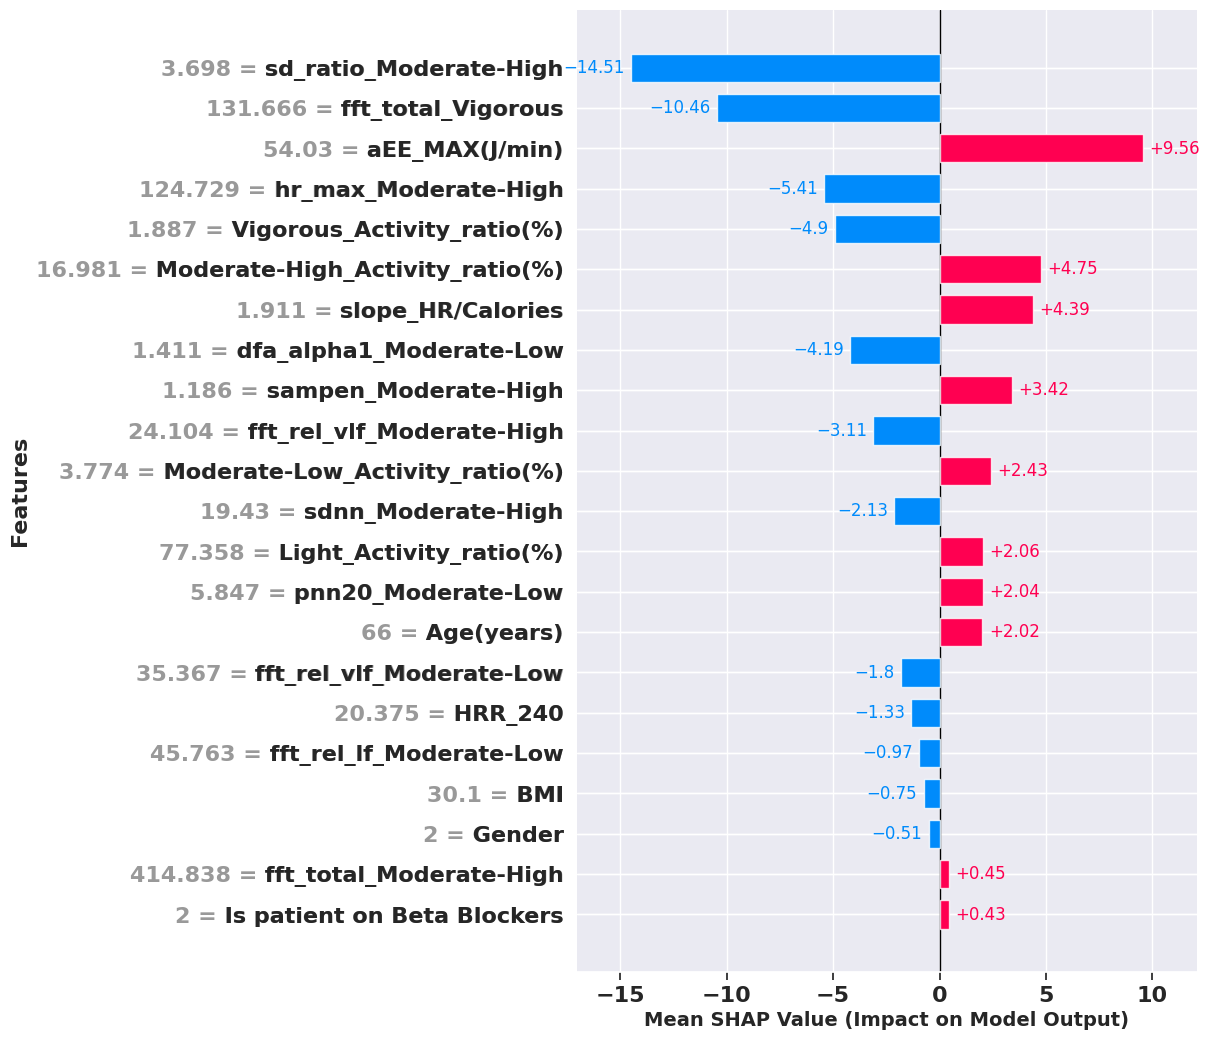

   aEE_MAX(J/min)  Light_Activity_ratio(%)  Moderate-Low_Activity_ratio(%)  \
0       -5.066240                 1.219799                       -1.902315   
1      -14.561444                -1.386958                        2.901221   
2       -2.033831                -3.095900                       -2.319327   
3        9.723829                -0.969560                        1.810073   
4        5.508969                -3.765577                        1.692361   

   Moderate-High_Activity_ratio(%)  Vigorous_Activity_ratio(%)   HRR_240  \
0                        -4.671964                   -6.535373 -1.200405   
1                       -15.199684                   -5.613947  0.767145   
2                        -4.565612                   -5.536482  0.681619   
3                        -4.346211                   -5.434765  0.018379   
4                        -4.103255                   -3.377428 -1.773147   

   slope_HR/Calories  fft_rel_lf_Moderate-Low  dfa_alpha1_Moderate-Low  \


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from datetime import datetime

print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = rfr.score(X_test, y_test)
print("R_sq: ",r_sq)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "blue")
plt.xlabel("Actual", fontsize=16, fontweight='bold')
plt.ylabel("Predicted", fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=0)
plt.yticks(fontsize=16, fontweight='bold', rotation=0)
prim_plot(y_test,y_pred_test)
plt.show()

regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))], random_state=42)
regr2.fit(X_train, y_train)

explainer2 = shap.Explainer(regr2, X_test)
check_additivity=False
shap_values2 = explainer2 (X_test, check_additivity=check_additivity)

ind = 10

print("Global Explaination")
shap.plots.bar(shap_values2,max_display=30,show=False)
plt.xlabel('Mean SHAP Value (Impact on Model Output)',fontweight="bold",fontsize=14)
plt.ylabel('Features',fontweight="bold",fontsize=16)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')

plt.show()
print("Global Explaination")

shap.summary_plot(shap_values2,max_display=30,show=False)
plt.xlabel('Low VO2_max_6MWT<<SHAP>>High V02_max_6MWT',fontweight="bold",fontsize=14)
plt.ylabel('Features',fontweight="bold",fontsize=16)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')

plt.show()
print("__________________________")
#shap.plots.violin(shap_values2, plot_type="layered_violin",max_display=30,show=False)
shap.plots.violin(shap_values2,max_display=30,show=False)
plt.xlabel('Low VO2_max_6MWT<<SHAP>>High V02_max_6MWT',fontweight="bold",fontsize=14)
plt.ylabel('Features',fontweight="bold",fontsize=16)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')

plt.show()
print("Local Explaination")
shap.plots.violin(shap_values2, max_display=30,show=False)
plt.xlabel('Low VO2_max_6MWT<<SHAP>>High V02_max_6MWT',fontweight="bold",fontsize=14)
plt.ylabel('Features',fontweight="bold",fontsize=16)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')

plt.show()

print("___________________________")

print("Local Explaination")
shap.plots.waterfall(shap_values2[ind],max_display=25,show=False)
plt.xlabel('Mean SHAP Value (Impact on Model Output)',fontweight="bold",fontsize=14)
plt.ylabel('Features',fontweight="bold",fontsize=16)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')

plt.show()


print("Local Explaination")

shap.plots.bar(shap_values2[ind],max_display=25,show=False)

plt.xlabel('Mean SHAP Value (Impact on Model Output)',fontweight="bold",fontsize=14)
plt.ylabel('Features',fontweight="bold",fontsize=16)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')

plt.show()



shap.initjs()

shap.plots.force(shap_values2[ind])


# Creating a DataFrame of SHAP values for analysis
feature_names = X_test.columns
shap_values_test_df = pd.DataFrame(shap_values2.values, columns=feature_names)

# Adding actual and predicted target values
shap_values_test_df['Actual_Target_6MWT'] = y_test.values
shap_values_test_df['Predicted_Target_6MWT'] = regr2.predict(X_test)

# Display the first few rows of SHAP values with actual and predicted targets
print(shap_values_test_df.head())

# Generate a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Define the file name with the timestamp
filename = f"shap_values_for_all_patients_test_{timestamp}.csv"

# Save the DataFrame to a CSV file with the timestamp
shap_values_test_df.to_csv(filename, index=False)

print(f"SHAP values saved to {filename}")



##### Final Regression Code

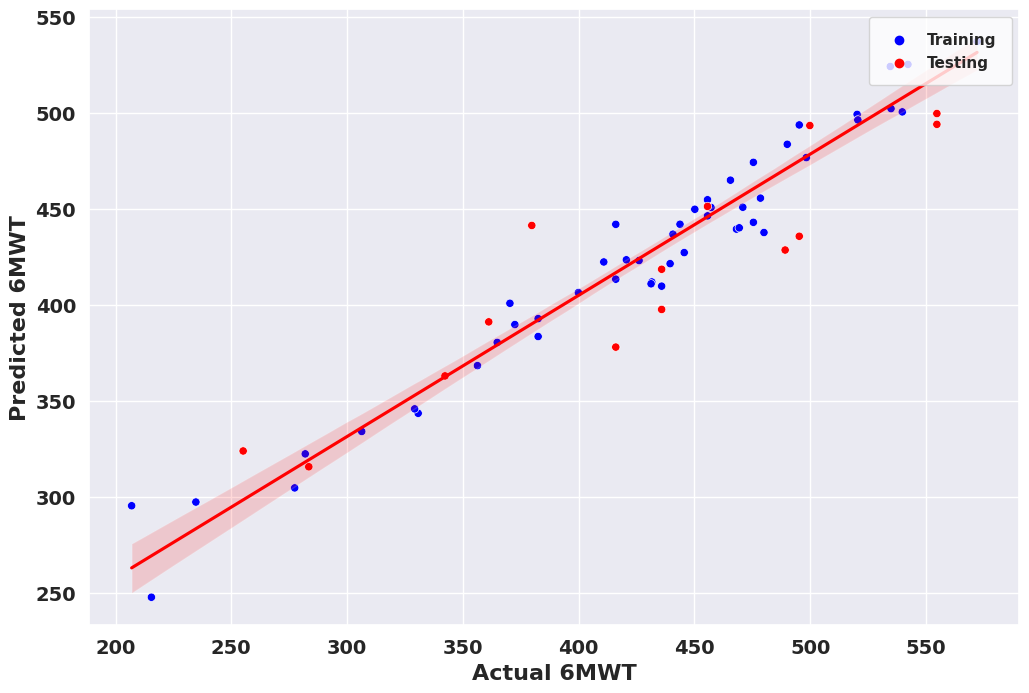

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import joblib
regr2 = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr2.fit(X_train, y_train)
y_pred_train = regr2.predict(X_train)
y_pred_test = regr2.predict(X_test)



train_data = pd.DataFrame({'X': y_train, 'y': y_pred_train, 'Type': 'Training'})
test_data = pd.DataFrame({'X': y_test, 'y': y_pred_test, 'Type': 'Testing'})
split_data = pd.concat([train_data, test_data])

# Plotting
plt.figure(figsize=(12, 8))
#sns.scatterplot(data=split_data, x='X', y='y', hue='Type', style='Type', palette=['blue', 'red'])
sns.scatterplot(data=train_data, x='X', y='y', hue='Type', style='Type', palette=['blue'])
sns.scatterplot(data=test_data, x='X', y='y', hue='Type', style='Type', palette=['red'])
sns.regplot(x="X", y="y", data=train_data, scatter=False, line_kws={"color": "red"})
plt.xticks(fontsize=14, fontweight='bold', rotation=0)
plt.yticks(fontsize=14, fontweight='bold', rotation=0)
plt.xlabel('Actual 6MWT', fontsize=16,  weight = 'bold')
plt.ylabel('Predicted 6MWT', fontsize=16, weight = 'bold')
#plt.title('Regression Line with Training and Testing Data Points', fontsize=16)

# Customize the legend with font size and weight
plt.legend(prop={'weight': 'bold'}, frameon=True, shadow=False, borderpad=1, facecolor='white', loc='upper right', title_fontsize='14')

plt.show()

In [ ]:
shap_values_test_df

aEE_MAX(J/min)  Light_Activity_ratio(%)  Moderate-Low_Activity_ratio(%)  \
0        -5.523277                -1.670174                        2.562456   
1         1.641700                -1.470755                       -7.391150   
2         3.083991                -1.123942                        1.496616   
3        -5.433346                -1.667336                       -2.456589   
4        -3.807849                 1.077173                       -7.148336   
5         3.945757                 1.073332                        2.916699   
6         3.060160                -0.554427                        0.798460   
7        -3.858243                -0.535659                        3.383215   
8         3.198705                 2.051085                        2.274341   
9         4.056609                 1.438086                        3.855384   
10       -1.787769                -0.558614                        1.480712   
11       -4.034902                 1.518879                       -6.712701   
12        3.697878                 1.163974                        1.713557   
13        1.760587                -0.741623                        3.227335   

    Moderate-High_Activity_ratio(%)  Vigorous_Activity_ratio(%)   HRR_240  \
0                        -30.129978                   -5.137457 -0.276403   
1                         -8.742182                   -4.482586  0.353697   
2                         -3.165138                   -1.033106 -0.278907   
3                        -28.768210                   -2.930166 -0.591715   
4                          9.538144                   -1.184783  0.163010   
5                         10.853678                   -3.144901 -1.828372   
6                          5.297764                    5.504833  0.480725   
7                          7.550242                   -7.024647 -1.106874   
8                          8.341376                    7.375226 -1.154128   
9                         -3.785002                   -2.641349  8.678795   
10                         5.335881                    5.752802 -0.854223   
11                        10.045177                   -3.583185 -1.261396   
12                         8.719568                    5.275223 -0.909769   
13                         8.908679                    7.254096 -1.414440   

    slope_HR/Calories  fft_rel_lf_Moderate-Low  dfa_alpha1_Moderate-Low  \
0          -14.371873               -12.935053                 0.138797   
1            4.427429               -10.279802                -6.077779   
2            4.080916                 5.409794                -7.467375   
3            3.418952                 3.634480                -4.378231   
4            0.497392                 4.291233                -8.204236   
5            5.969524                 2.009707                -5.800840   
6            3.902133                -8.068297                -5.972400   
7          -14.588981                 4.050625                 7.872198   
8            4.471801                 4.310203                 9.842447   
9            1.632987                 4.924051                 3.120407   
10           3.844600                 3.585639                 7.097758   
11         -11.185504                 4.524260                -3.679601   
12           4.233488                 3.869214                12.181290   
13           3.667136                -9.326053                 1.330176   

    sd_ratio_Moderate-High  ...  sdnn_Moderate-High  pnn20_Moderate-Low  \
0                 4.459826  ...           -5.486191            2.554473   
1               -14.309404  ...           -6.565921           -1.125159   
2                -6.244769  ...           -4.918084           -1.845352   
3                 4.855516  ...           -3.726800           -0.778204   
4                 0.362690  ...            2.797375           -2.165786   
5               -13.450635  ...           -3.394897           -0.067313   
6          

In [ ]:
shap_values_test_df['Actual_Target_6MWT'].value_counts()

554.7360    2
435.8640    2
283.4640    1
255.1176    1
342.2904    1
361.1880    1
416.0520    1
379.7808    1
499.8720    1
489.2040    1
455.6760    1
495.3000    1
Name: Actual_Target_6MWT, dtype: int64

In [ ]:
shap_values__training_df

aEE_MAX(J/min)  Light_Activity_ratio(%)  Moderate-Low_Activity_ratio(%)  \
0       -11.297906                -1.772554                      -11.088070   
1        -8.356757                -1.762613                        1.257804   
2        -1.514483                -1.982352                       -9.269855   
3       -11.626956                -2.229302                      -11.522443   
4        -2.652100                 0.722247                       -9.055689   
5         3.855649                -2.565605                        0.150370   
6         1.309929                -1.095076                        0.990782   
7        -5.646414                -1.130305                        4.317286   
8        -5.991759                -1.793721                       -4.486947   
9         2.966973                -3.919234                        1.906916   
10       -5.474718                 1.994782                       -5.446201   
11        4.076426                -0.709490                        2.101798   
12       -1.007552                -0.957700                        3.003643   
13        1.773088                 0.181607                       -0.900215   
14        3.725485                 1.139069                        1.748188   
15        1.372641                 0.952444                        0.580123   
16       -7.929741                -0.823015                        4.166685   
17       -5.448378                 2.092472                       -4.212140   
18        1.271865                -0.242705                        2.752720   
19       -5.124674                -0.654257                        3.119818   
20       -0.530317                 0.806110                        0.430428   
21        1.849845                 0.257438                        0.546860   
22       -0.598044                 1.903475                        3.564714   
23        1.271457                 0.116232                       -2.213576   
24        2.148127                 0.361153                        0.649530   
25        1.382899                 0.345635                       -0.148159   
26        1.246466                -0.308561                        1.985502   
27        1.725997                -1.075354                       -2.055994   
28        2.667327                -1.289130                       -5.055252   
29        1.839153                 1.005435                       -5.195859   
30        2.956565                -1.103062                        0.147127   
31        3.097119                -0.693860                        1.436775   
32        3.754667                 2.412604                        3.101261   
33        3.123618                -1.568225                        1.423479   
34        3.395003                 0.782846                        3.642013   
35        1.994774                 0.864170                        1.517668   
36        3.270200                 2.217095                        4.250294   
37       -1.247932                 1.126369                       -4.918856   
38        1.591958                 1.456509                       -7.936999   
39        3.646949                -0.044459                        4.717051   
40       -4.053988                -0.496743                        2.523287   
41        2.605662                 0.489756                        1.892605   
42       -0.886853                 0.609454                        2.006864   
43        1.457350                 0.728527                        1.900829   
44       -0.840092                -0.886205                        1.219448   
45        3.437149                 2.147663                        4.175220   
46        2.835436                 0.919619                        3.659133   
47        2.664409                 0.752945                        4.177559   
48        3.132226                 1.296735                        3.703963   
49        2.782251                 1.438308           

In [ ]:
shap_values__training_df['Actual_Target_6MWT'].value_counts()

416.0520    3
455.6760    2
475.4880    2
382.5240    2
215.4936    1
356.3112    1
364.8456    1
330.7080    1
329.1840    1
234.6960    1
281.9400    1
206.9592    1
277.3680    1
440.7408    1
439.5216    1
431.5968    1
306.3240    1
431.2920    1
435.8640    1
445.6176    1
399.8976    1
372.4656    1
443.7888    1
370.3320    1
426.1104    1
520.2936    1
450.1896    1
420.6240    1
410.8704    1
468.1728    1
490.1184    1
469.3920    1
495.3000    1
478.5360    1
457.2000    1
520.5984    1
480.0600    1
470.9160    1
465.5820    1
498.3480    1
539.8008    1
542.2392    1
534.6192    1
534.9240    1
572.1096    1
Name: Actual_Target_6MWT, dtype: int64

In [ ]:
combined_df = pd.concat([shap_values__training_df, shap_values_test_df], ignore_index=True)
combined_df

aEE_MAX(J/min)  Light_Activity_ratio(%)  Moderate-Low_Activity_ratio(%)  \
0       -11.297906                -1.772554                      -11.088070   
1        -8.356757                -1.762613                        1.257804   
2        -1.514483                -1.982352                       -9.269855   
3       -11.626956                -2.229302                      -11.522443   
4        -2.652100                 0.722247                       -9.055689   
5         3.855649                -2.565605                        0.150370   
6         1.309929                -1.095076                        0.990782   
7        -5.646414                -1.130305                        4.317286   
8        -5.991759                -1.793721                       -4.486947   
9         2.966973                -3.919234                        1.906916   
10       -5.474718                 1.994782                       -5.446201   
11        4.076426                -0.709490                        2.101798   
12       -1.007552                -0.957700                        3.003643   
13        1.773088                 0.181607                       -0.900215   
14        3.725485                 1.139069                        1.748188   
15        1.372641                 0.952444                        0.580123   
16       -7.929741                -0.823015                        4.166685   
17       -5.448378                 2.092472                       -4.212140   
18        1.271865                -0.242705                        2.752720   
19       -5.124674                -0.654257                        3.119818   
20       -0.530317                 0.806110                        0.430428   
21        1.849845                 0.257438                        0.546860   
22       -0.598044                 1.903475                        3.564714   
23        1.271457                 0.116232                       -2.213576   
24        2.148127                 0.361153                        0.649530   
25        1.382899                 0.345635                       -0.148159   
26        1.246466                -0.308561                        1.985502   
27        1.725997                -1.075354                       -2.055994   
28        2.667327                -1.289130                       -5.055252   
29        1.839153                 1.005435                       -5.195859   
30        2.956565                -1.103062                        0.147127   
31        3.097119                -0.693860                        1.436775   
32        3.754667                 2.412604                        3.101261   
33        3.123618                -1.568225                        1.423479   
34        3.395003                 0.782846                        3.642013   
35        1.994774                 0.864170                        1.517668   
36        3.270200                 2.217095                        4.250294   
37       -1.247932                 1.126369                       -4.918856   
38        1.591958                 1.456509                       -7.936999   
39        3.646949                -0.044459                        4.717051   
40       -4.053988                -0.496743                        2.523287   
41        2.605662                 0.489756                        1.892605   
42       -0.886853                 0.609454                        2.006864   
43        1.457350                 0.728527                        1.900829   
44       -0.840092                -0.886205                        1.219448   
45        3.437149                 2.147663                        4.175220   
46        2.835436                 0.919619                        3.659133   
47        2.664409                 0.752945                        4.177559   
48        3.132226                 1.296735                        3.703963   
49        2.782251                 1.438308           

In [ ]:
dataset

Subject_ID Condition  HR_MAX(BPM)  aEE_MAX(J/min)  slope_HR/Calories  \
0      001-JV       pre          149           68.22           1.319097   
1      002-JR       pre          137           63.81           1.146421   
2      003-ES       pre          130           34.42           2.083209   
3      004-LY       pre          165           51.24           2.026975   
4      005-DF       pre          179           83.00           1.499019   
5      006-MK       pre          168           48.37           2.233958   
6      007-DD       pre          142           26.59           3.002710   
7      008-KL       pre          153           69.03           1.171077   
8      010-ML       pre          169           66.73           1.640966   
9      011-CR       pre          152           51.28           1.621751   
10     012-DP       pre          124           41.60           1.599293   
11     013-MB       pre          175           66.97           2.130260   
12     014-WK       pre          164           65.43           1.527958   
13     015-BL       pre          176           63.65           1.684566   
14     017-RF       pre          134           39.16           2.105147   
15    018-PDT       pre          162           61.02           2.011985   
16     019-CM       pre          167           68.38           1.284240   
17     020-GB       pre          172           59.56           2.066930   
18    021-GDB       pre          180           63.83           2.039432   
19     022-ND       pre          168           55.07           2.268744   
20     023-FG       pre          173           53.71           2.291315   
21     024-DP       pre          177           81.43           1.484109   
22     025-IP       pre          167           43.79           2.494353   
23     026-LW       pre          153           48.79           1.998497   
24     027-SR       pre          190           48.85           3.068228   
25     028-JR       pre          182           47.06           2.292753   
26     029-RR       pre          161           44.72           2.207018   
27     031-SG       pre          160           33.95           2.687436   
28     032-SS       pre          141           24.02           2.466500   
29     033-PJ       pre          128           27.82           2.325317   
30     034-DS       pre          154           33.74           2.375623   
31     035-DP       pre          165           48.12           2.180889   
32     036-RD       pre          139           32.53           2.548622   
33     037-JB       pre          153           32.07           3.070198   
34     038-JS       pre          136           56.93           1.132680   
35     039-NS       pre          133           28.06           2.215856   
36     040-EH       pre          153           35.35           3.134372   
37     042-BJ       pre          166           64.70           1.555854   
38     043-AK       pre          177           46.69           2.855498   
39     044-CW       pre          160           41.17           2.595723   
40     045-TH       pre          144           57.19           1.813394   
41     046-JB       pre          169           51.22           2.176591   
42     047-AD       pre          148           65.22           0.874146   
43     048-JJ       pre          157           44.53           2.554792   
44     049-IG       pre          167           50.75           1.655560   
45     050-JR       pre          181           59.86           2.408246   
46     051-WS       pre          132           49.61           1.524767   
47    053-SFR       pre          153           58.14           1.501430   
48     054-CW       pre          167           56.56           1.853427   
49     055-AM       pre          137           48.76           1.613321   
50     056-UF       pre          146           39.93           2.284330   
51     057-AK       pre          133           70.83           0.976726   
52     058-BC       pre     

In [ ]:
combined_df_1 = combined_df.rename(columns={'Actual_Target_6MWT': '6MWT_m'})

In [ ]:
combined_df_1

aEE_MAX(J/min)  Light_Activity_ratio(%)  Moderate-Low_Activity_ratio(%)  \
0       -11.297906                -1.772554                      -11.088070   
1        -8.356757                -1.762613                        1.257804   
2        -1.514483                -1.982352                       -9.269855   
3       -11.626956                -2.229302                      -11.522443   
4        -2.652100                 0.722247                       -9.055689   
5         3.855649                -2.565605                        0.150370   
6         1.309929                -1.095076                        0.990782   
7        -5.646414                -1.130305                        4.317286   
8        -5.991759                -1.793721                       -4.486947   
9         2.966973                -3.919234                        1.906916   
10       -5.474718                 1.994782                       -5.446201   
11        4.076426                -0.709490                        2.101798   
12       -1.007552                -0.957700                        3.003643   
13        1.773088                 0.181607                       -0.900215   
14        3.725485                 1.139069                        1.748188   
15        1.372641                 0.952444                        0.580123   
16       -7.929741                -0.823015                        4.166685   
17       -5.448378                 2.092472                       -4.212140   
18        1.271865                -0.242705                        2.752720   
19       -5.124674                -0.654257                        3.119818   
20       -0.530317                 0.806110                        0.430428   
21        1.849845                 0.257438                        0.546860   
22       -0.598044                 1.903475                        3.564714   
23        1.271457                 0.116232                       -2.213576   
24        2.148127                 0.361153                        0.649530   
25        1.382899                 0.345635                       -0.148159   
26        1.246466                -0.308561                        1.985502   
27        1.725997                -1.075354                       -2.055994   
28        2.667327                -1.289130                       -5.055252   
29        1.839153                 1.005435                       -5.195859   
30        2.956565                -1.103062                        0.147127   
31        3.097119                -0.693860                        1.436775   
32        3.754667                 2.412604                        3.101261   
33        3.123618                -1.568225                        1.423479   
34        3.395003                 0.782846                        3.642013   
35        1.994774                 0.864170                        1.517668   
36        3.270200                 2.217095                        4.250294   
37       -1.247932                 1.126369                       -4.918856   
38        1.591958                 1.456509                       -7.936999   
39        3.646949                -0.044459                        4.717051   
40       -4.053988                -0.496743                        2.523287   
41        2.605662                 0.489756                        1.892605   
42       -0.886853                 0.609454                        2.006864   
43        1.457350                 0.728527                        1.900829   
44       -0.840092                -0.886205                        1.219448   
45        3.437149                 2.147663                        4.175220   
46        2.835436                 0.919619                        3.659133   
47        2.664409                 0.752945                        4.177559   
48        3.132226                 1.296735                        3.703963   
49        2.782251                 1.438308           

In [ ]:
#combined_df_1["Subject_ID"]=""
combined_df_1.insert(0, "Subject_ID", '')
for i in range(combined_df_1.shape[0]):
    match = pre_dataset[pre_dataset["6MWT_m"] == combined_df_1["6MWT_m"].iloc[i]]
    print (match["Subject_ID"].values[0], combined_df_1["6MWT_m"].iloc[i])
    if not match.empty:
        combined_df_1.at[i,"Subject_ID"] = match["Subject_ID"].values[0]

007-DD 215.49360000000001
017-RF 234.696
029-RR 281.94
040-EH 206.9592
059-JC 277.368
001-JV 356.31120000000004
004-LY 364.8456
031-SG 330.708
036-RD 329.184
047-AD 306.324
003-ES 431.59680000000003
008-KL 439.52160000000003
012-DP 440.74080000000004
015-BL 399.8976
024-DP 416.052
028-JR 445.61760000000004
032-SS 431.29200000000003
034-DS 435.86400000000003
024-DP 416.052
037-JB 382.524
024-DP 416.052
046-JB 420.624
048-JJ 410.8704
049-IG 372.4656
053-SFR 443.78880000000004
054-CW 370.332
055-AM 426.1104
037-JB 382.524
002-JR 520.2936
006-MK 450.18960000000004
010-ML 490.1184
011-CR 468.17280000000005
014-WK 469.392
018-PDT 455.67600000000004
019-CM 475.488
020-GB 495.3
023-FG 478.536
025-IP 457.20000000000005
027-SR 520.5984
038-JS 480.06
039-NS 470.916
042-BJ 465.58200000000005
044-CW 498.348
019-CM 475.488
018-PDT 455.67600000000004
005-DF 539.8008
013-MB 542.2392
021-GDB 534.6192
022-ND 534.924
026-LW 572.1096
060-CB 283.464
063-LH 255.1176
051-WS 361.18800000000005
064-KL 342.2904

In [ ]:
combined_df_1

Subject_ID  aEE_MAX(J/min)  Light_Activity_ratio(%)  \
0      007-DD      -11.297906                -1.772554   
1      017-RF       -8.356757                -1.762613   
2      029-RR       -1.514483                -1.982352   
3      040-EH      -11.626956                -2.229302   
4      059-JC       -2.652100                 0.722247   
5      001-JV        3.855649                -2.565605   
6      004-LY        1.309929                -1.095076   
7      031-SG       -5.646414                -1.130305   
8      036-RD       -5.991759                -1.793721   
9      047-AD        2.966973                -3.919234   
10     003-ES       -5.474718                 1.994782   
11     008-KL        4.076426                -0.709490   
12     012-DP       -1.007552                -0.957700   
13     015-BL        1.773088                 0.181607   
14     024-DP        3.725485                 1.139069   
15     028-JR        1.372641                 0.952444   
16     032-SS       -7.929741                -0.823015   
17     034-DS       -5.448378                 2.092472   
18     024-DP        1.271865                -0.242705   
19     037-JB       -5.124674                -0.654257   
20     024-DP       -0.530317                 0.806110   
21     046-JB        1.849845                 0.257438   
22     048-JJ       -0.598044                 1.903475   
23     049-IG        1.271457                 0.116232   
24    053-SFR        2.148127                 0.361153   
25     054-CW        1.382899                 0.345635   
26     055-AM        1.246466                -0.308561   
27     037-JB        1.725997                -1.075354   
28     002-JR        2.667327                -1.289130   
29     006-MK        1.839153                 1.005435   
30     010-ML        2.956565                -1.103062   
31     011-CR        3.097119                -0.693860   
32     014-WK        3.754667                 2.412604   
33    018-PDT        3.123618                -1.568225   
34     019-CM        3.395003                 0.782846   
35     020-GB        1.994774                 0.864170   
36     023-FG        3.270200                 2.217095   
37     025-IP       -1.247932                 1.126369   
38     027-SR        1.591958                 1.456509   
39     038-JS        3.646949                -0.044459   
40     039-NS       -4.053988                -0.496743   
41     042-BJ        2.605662                 0.489756   
42     044-CW       -0.886853                 0.609454   
43     019-CM        1.457350                 0.728527   
44    018-PDT       -0.840092                -0.886205   
45     005-DF        3.437149                 2.147663   
46     013-MB        2.835436                 0.919619   
47    021-GDB        2.664409                 0.752945   
48     022-ND        3.132226                 1.296735   
49     026-LW        2.782251                 1.438308   
50     060-CB       -5.523277                -1.670174   
51     063-LH        1.641700                -1.470755   
52     051-WS        3.083991                -1.123942   
53     064-KL       -5.433346                -1.667336   
54     058-BC       -3.807849                 1.077173   
55     024-DP        3.945757                 1.073332   
56     034-DS        3.060160                -0.554427   
57     034-DS       -3.858243                -0.535659   
58     065-AL        3.198705                 2.051085   
59     067-MS        4.056609                 1.438086   
60    018-PDT       -1.787769                -0.558614   
61     020-GB       -4.034902                 1.518879   
62     045-TH        3.697878                 1.163974   
63     045-TH        1.760587                -0.741623   

    Moderate-Low_Activity_ratio(%)  Moderate-High_Activity_ratio(%)  \
0                       -11.088070                       -30.307043   
1                         1.257804                       -31.803901   
2                  

In [ ]:
combined_df_1.to_csv('Personalozed SHAP Matrix.csv', index=False)

Subject_ID  aEE_MAX(J/min)  Light_Activity_ratio(%)  \
0      007-DD      -11.297906                -1.772554   
1      017-RF       -8.356757                -1.762613   
2      029-RR       -1.514483                -1.982352   
3      040-EH      -11.626956                -2.229302   
4      059-JC       -2.652100                 0.722247   
..        ...             ...                      ...   
59     067-MS        4.056609                 1.438086   
60    018-PDT       -1.787769                -0.558614   
61     020-GB       -4.034902                 1.518879   
62     045-TH        3.697878                 1.163974   
63     045-TH        1.760587                -0.741623   

    Moderate-Low_Activity_ratio(%)  Moderate-High_Activity_ratio(%)  \
0                       -11.088070                       -30.307043   
1                         1.257804                       -31.803901   
2                        -9.269855                        -1.760173   
3                       -11.522443                       -32.511171   
4                        -9.055689                        -5.490033   
..                             ...                              ...   
59                        3.855384                        -3.785002   
60                        1.480712                         5.335881   
61                       -6.712701                        10.045177   
62                        1.713557                         8.719568   
63                        3.227335                         8.908679   

    Vigorous_Activity_ratio(%)   HRR_240  slope_HR/Calories  \
0                    -9.787681 -5.922622         -14.983099   
1                    -7.353397 -1.835567           0.795584   
2                    -8.398486 -5.670787          -0.467284   
3                   -11.880180 -5.377445         -19.621803   
4                    -8.764976 -4.293907          -9.282095   
..                         ...       ...                ...   
59                   -2.641349  8.678795           1.632987   
60                    5.752802 -0.854223           3.844600   
61                   -3.583185 -1.261396         -11.185504   
62                    5.275223 -0.909769           4.233488   
63                    7.254096 -1.414440           3.667136   

    fft_rel_lf_Moderate-Low  dfa_alpha1_Moderate-Low  ...  sdnn_Moderate-High  \
0                -19.216103                -5.677232  ...           -5.870685   
1                -18.457317                -1.158045  ...           -7.475847   
2                 -7.961247                -8.452171  ...           -5.868412   
3                  2.195619                 7.403922  ...            0.176306   
4                -19.759297                -0.425613  ...           -5.573852   
..                      ...                      ...  ...                 ...   
59                 4.924051                 3.120407  ...            0.698001   
60                 3.585639                 7.097758  ...            1.325320   
61                 4.524260                -3.679601  ...            3.151847   
62                 3.869214                12.181290  ...            3.886528   
63                -9.326053                 1.330176  ...            4.542920   

    pnn20_Moderate-Low  fft_total_Moderate-High  fft_rel_vlf_Moderate-High  \
0            -2.583307                -8.792643                  -5.186234   
1             0.396707                -0.506086                   3.277972   
2            -1.349951                -8.475871                  -6.978559   
3            -4.247051                -5.030149                   1.051695   
4            -1.236646                -3.909328                  -6.170375   
..                 ...                      ...                        ...   
59            2.381653                 9.347552                  -4.697528   
60           -0.039515                -2.309729                   2.114088   
61           -2.09851